In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)  

In [30]:
feature = pd.read_csv('multiasset_feature.csv')
idx = pd.read_csv('multiasset_index.csv')
idx.columns = ['Date', 'Idx_Price']
# idx['Date'] = idx.index
feature.shape, idx.shape

((252, 60), (252, 2))

In [40]:
dt = feature.merge(idx, how='left', on='Date')
dt.shape

(252, 61)

In [44]:
idx.head()

,Date,Idx_Price
0,1/31/2000,186.5
1,2/29/2000,197.7
2,3/31/2000,188.2
3,4/30/2000,180.4
4,5/31/2000,185.5


In [47]:
idx['returns'] = idx['Idx_Price'] / idx['Idx_Price'].shift(1) - 1
idx

,Date,Idx_Price,returns
0,1/31/2000,186.5,NaN
1,2/29/2000,197.7,0.060054
2,3/31/2000,188.2,-0.048053
3,4/30/2000,180.4,-0.041445
4,5/31/2000,185.5,0.028271
5,6/30/2000,179.2,-0.033962
6,7/31/2000,183.2,0.022321
7,8/31/2000,172.3,-0.059498
8,9/30/2000,168.1,-0.024376
9,10/31/2000,156.8,-0.067222


In [56]:
# Maximum DrawDown
s=(idx['returns']+1).cumprod()
s = s[1:]
np.ptp(s)/s.max()

0.651699029126214

In [ ]:
# Average 3 years Rolling Sharpe Ratio


# data exploration

In [4]:
# Plot
df0 = dt.drop('Date', axis=1)

fig, axes = plt.subplots(nrows=30, ncols=2, dpi=120, figsize=(16,200))
for i, ax in enumerate(axes.flatten()):
    data = df0[df0.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df0.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

,Date,Cycle Indicator Global,Eurozone Retail Sales,Eurozone Industrial Production exconstr,Eurozone Industrial Production manuf,US Privately Owned Housing Starts,US HomeBuilders Market Index,US Real Personal Income,US Real Personal Income exTrans,US Indus Prod Index,Adv Retail Sales US exFood Services,US JoblessClaims Seasonally Adjusted,US U6 Unemp Rate,World EPS forecast 3M Change,US M1 Growth YOY,RealUS M1 Growth YOY,FED Excess Reserves,Fed Balance Sheet,ECB Balance Sheet,Real Yield US,US 10yr Rate,Germany 10yr Rate,EU 10Y 2Y Curve,US 10Y 2Y Curve,Fed Fwd 6 Month,Fed Fwd 12 Month,Chinese Oil Imports,Japanese Export China,Industrial Metal Prices,US Core CPI,Inflation Surprise Global,US Breakeven Inflation,US PCE YOY,US Financial Conditions Index A,US Financial Conditions Index B,EU Financial Conditions Index A,EU Financial Conditions Index B,US IG Spreads,US HY Spreads,EU IG Spreads,EU HY Spreads,US Credit Standards,Global Equity 3 Month Momentum,Global Equity 6 Month Momentum,Global Equity 12 Month Momentum,Vix Index,Commercial Paper Spread,V2x Index,Eonia Spread,Equity Risk Premia,Sentiment Macro Fundamentals Global News Social,Sentiment Consumer Sentiment Global News Social,Sentiment Economic Growth Global News Social,Sentiment Trade Balance Global News Social,Sentiment environmental composite GLOBAL News,Sentiment social composite GLOBAL News,Sentiment governance composite GLOBAL News,Sentiment governance composite GLOBAL News Social,Sentiment social composite GLOBAL News Social,Sentiment environmental composite GLOBAL News Social,Idx_Price
0,1/31/2000,0.8,89.8,91.4,89.6,-1.5,71.0,"9,198.9","8,026.0",90.6,"243,994.9",287.6,7.2,0.4,2.0,0.0,13.6,"594,206.7",745.3,4.2,6.2,5.1,122.7,20.8,5.8,5.2,1.2,0.0,115.7,2.0,-2.9,1.9,1.4,98.5,-0.1,98.9,0.1,200.5,3.6,0.0,0.1,7.1,0.0,0.1,0.2,23.2,58.5,26.2,2.9,1.4,0.7,0.9,1.4,0.1,0.3,0.1,0.5,1.0,0.3,0.1,186.5
1,2/29/2000,0.8,90.0,91.7,89.8,-2.9,70.4,"9,260.6","8,085.4",90.9,"245,984.4",289.5,7.2,0.6,1.8,0.0,13.2,"591,664.5",748.7,4.3,6.3,5.2,118.6,12.7,5.9,5.2,1.5,-0.1,117.7,2.0,-0.6,2.0,1.4,98.5,0.0,98.7,0.1,194.3,3.6,0.0,0.1,7.6,0.0,0.1,0.2,23.3,49.8,27.3,3.0,1.4,0.7,0.8,1.5,0.1,0.3,0.0,0.6,1.2,0.3,0.1,197.7
2,3/31/2000,0.9,90.3,91.8,89.8,-0.9,69.7,"9,310.3","8,133.7",91.3,"248,540.8",285.2,7.1,0.7,1.5,0.0,13.3,"588,879.5",754.6,4.3,6.3,5.3,108.8,0.3,6.1,5.2,1.8,0.0,118.8,2.1,1.5,2.0,1.5,98.5,0.1,98.5,0.2,200.0,3.7,0.0,0.1,7.6,0.0,0.1,0.2,23.2,41.8,27.7,3.1,1.4,0.6,0.6,1.4,0.0,0.2,-0.1,0.7,1.2,0.2,0.0,188.2
3,4/30/2000,0.9,90.5,92.2,90.3,-2.4,68.1,"9,358.6","8,177.8",91.6,"251,236.0",280.6,7.1,0.9,1.5,0.0,13.5,"590,164.3",760.3,4.2,6.2,5.3,100.5,-11.1,6.2,5.2,1.5,0.0,118.1,2.2,4.1,2.0,1.6,98.5,0.0,98.3,0.2,210.9,3.7,0.0,0.1,7.6,0.0,0.1,0.2,24.2,41.1,27.9,3.3,1.4,0.3,0.7,1.0,-0.1,0.4,-0.4,0.6,1.1,-0.1,0.2,180.4
4,5/31/2000,0.9,90.8,92.6,90.7,-0.4,66.6,"9,401.1","8,209.4",92.0,"252,200.6",281.2,7.1,1.0,1.1,0.0,13.8,"589,079.5",765.1,4.2,6.3,5.3,84.1,-18.6,6.4,5.2,1.3,0.0,118.9,2.2,5.8,2.1,1.6,98.7,-0.3,98.2,0.2,221.8,3.7,0.0,0.2,11.6,0.0,0.1,0.2,24.8,50.1,27.9,3.5,1.4,0.2,0.5,0.6,-0.1,0.3,-0.5,0.4,1.1,-0.2,0.0,185.5
5,6/30/2000,0.8,91.2,93.2,91.3,-0.9,65.6,"9,437.7","8,241.8",92.4,"253,093.3",283.1,7.1,1.0,0.9,0.0,13.6,"588,471.6",771.3,4.2,6.2,5.3,67.2,-23.9,6.6,5.2,1.0,0.1,118.5,2.3,6.1,2.1,1.7,98.7,-0.4,98.2,0.1,226.9,3.8,0.0,0.2,11.6,0.0,0.0,0.1,23.8,60.4,26.5,3.7,1.4,0.3,0.6,0.6,-0.1,0.2,-0.4,0.4,1.1,-0.1,0.0,179.2
6,7/31/2000,0.7,91.3,94.0,92.1,-0.7,63.4,"9,476.9","8,277.3",92.7,"253,921.8",286.3,7.0,1.0,0.7,0.0,13.6,"587,305.7",777.5,4.2,6.2,5.3,53.1,-25.1,6.6,5.2,1.0,0.2,119.2,2.3,6.4,2.1,1.7,98.7,-0.4,98.2,0.2,227.7,3.8,0.0,0.2,11.6,0.0,0.0,0.1,22.7,57.5,25.0,3.9,1.4,0.3,0.7,0.7,0.0,0.3,-0.5,0.3,0.9,-0.1,0.1,183.2
7,8/31/2000,0.7,91.5,94.2,92.4,-4.0,62.2,"9,516.3","8,311.7",92.8,"254,893.6",292.3,7.1,0.9,0.5,0.0,13.6,"586,105.6",781.6,4.1,6.1,5.2,37.8,-29.4,6.6,5.2,1.1,0.2,120.3,2.4,7.9,2.0,1.7,98.7,-0.2,98.2,0.1,232.6,4.2,0.1,1.5,14.3,0.0,0.0,0.1,21.3,49.7,23.7,4.1,1.4,0.1,0.6,0

In [15]:
# take a look at each features correlation
corr_mat = dt.drop('Date', axis=1).corr()
# corr_mat.to_csv('feature_correlation.csv')
corr_mat

,Cycle Indicator Global,Eurozone Retail Sales,Eurozone Industrial Production exconstr,Eurozone Industrial Production manuf,US Privately Owned Housing Starts,US HomeBuilders Market Index,US Indus Prod Index,US JoblessClaims Seasonally Adjusted,US U6 Unemp Rate,World EPS forecast 3M Change,US M1 Growth YOY,RealUS M1 Growth YOY,FED Excess Reserves,ECB Balance Sheet,Real Yield US,US 10yr Rate,Germany 10yr Rate,EU 10Y 2Y Curve,US 10Y 2Y Curve,Fed Fwd 6 Month,Fed Fwd 12 Month,Chinese Oil Imports,Japanese Export China,Industrial Metal Prices,US Core CPI,Inflation Surprise Global,US Breakeven Inflation,US PCE YOY,US Financial Conditions Index A,US Financial Conditions Index B,EU Financial Conditions Index A,EU Financial Conditions Index B,US IG Spreads,US HY Spreads,EU IG Spreads,EU HY Spreads,US Credit Standards,Global Equity 3 Month Momentum,Global Equity 6 Month Momentum,Global Equity 12 Month Momentum,Vix Index,Commercial Paper Spread,V2x Index,Eonia Spread,Equity Risk Premia,Sentiment Macro Fundamentals Global News Social,Sentiment Consumer Sentiment Global News Social,Sentiment Economic Growth Global News Social,Sentiment Trade Balance Global News Social,Sentiment environmental composite GLOBAL News,Sentiment social composite GLOBAL News,Sentiment governance composite GLOBAL News,Sentiment governance composite GLOBAL News Social,Sentiment social composite GLOBAL News Social,Sentiment environmental composite GLOBAL News Social,Idx_Price
Cycle Indicator Global,1.000000,0.071681,0.196184,0.247651,0.478088,0.746219,0.416637,-0.446413,-0.597635,0.718344,-0.148397,-0.285830,0.169590,0.158326,0.007745,0.098460,-0.228876,-0.202754,-0.464100,0.324552,0.186096,0.302526,0.271491,-0.261557,0.064212,-0.159706,0.303301,0.246950,-0.676467,0.854540,-0.624236,0.803100,-0.819873,-0.844092,-0.779781,-0.766741,-0.639299,0.348631,0.493179,0.603105,-0.770414,-0.585437,-0.694619,-0.198288,-0.379656,0.146429,0.323875,0.466436,0.313084,0.287522,-0.433798,-0.384044,-0.312139,-0.340486,0.310079,0.583763
Eurozone Retail Sales,0.071681,1.000000,0.648015,0.711110,-0.143614,0.039890,0.597104,0.111803,-0.096369,0.019041,0.325144,0.209682,0.455750,0.783720,-0.528139,-0.580171,-0.695165,-0.368287,-0.339059,-0.201440,-0.349390,-0.433615,-0.246353,0.448978,-0.017714,-0.017938,-0.152822,0.085429,-0.191013,0.103221,0.284097,-0.020504,-0.189794,-0.210328,0.163046,-0.266553,0.008956,0.028908,0.044685,0.070617,-0.169134,0.133485,-0.326721,-0.524501,0.469698,-0.272641,-0.271890,-0.438854,-0.234913,-0.519915,-0.548000,-0.101051,-0.384321,-0.620107,-0.438306,0.616571
Eurozone Industrial Production exconstr,0.196184,0.648015,1.000000,0.983945,-0.212600,0.004567,0.785131,-0.346359,-0.466680,0.217367,-0.239604,-0.343188,0.091087,0.301164,-0.175749,-0.144749,-0.282266,-0.536731,-0.445774,0.192828,0.024025,-0.337383,-0.038291,0.495878,0.339964,0.389702,0.177750,0.567529,-0.310410,0.106657,0.040268,-0.005699,-0.336466,-0.323283,-0.077663,-0.336356,-0.164813,-0.162618,-0.055059,0.124689,-0.320877,0.369541,-0.405320,-0.029117,0.180746,-0.092186,-0.421460,-0.268808,-0.133784,-0.322253,-0.481488,-0.160271,-0.401615,-0.557888,-0.239508,0.434866
Eurozone Industrial Production manuf,0.247651,0.711110,0.983945,1.000000,-0.135635,0.073517,0.838669,-0.310116,-0.453600,0.189672,-0.167165,-0.250123,0.244350,0.441638,-0.275425,-0.267517,-0.427030,-0.551753,-0.465326,0.112735,-0.068928,-0.347173,-0.094830,0.460945,0.319253,0.307877,0.084004,0.478217,-0.363324,0.157559,0.019500,0.018333,-0.333774,-0.347771,-0.065306,-0.372153,-0.174035,-0.143746,-0.051515,0.120208,-0.344087,0.305577,-0.430379,-0.161027,0.254178,-0.181074,-0.343972,-0.300681,-0.174480,-0.355950,-0.564739,-0.203813,-0.427171,-0.624000,-0.281457,0.532564
US Privately Owned Housing Starts,0.478088,-0.143614,-0.212600,-0.135635,1.000000,0.477399,0.142753,-0.070584,0.070923,0.325696,0.083805,0.113133,0.405072,0.245353,-0.454493,-0.368023,-0.385560,0.241567,0.116784,-0.337477,-0.252860,-0.033672,0.097344,-0.302052,-0.189466,-0.39305

##  

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

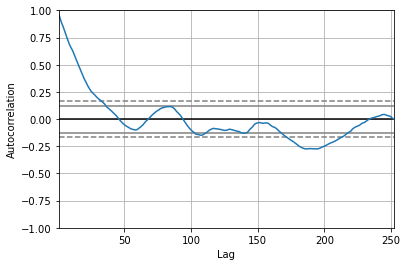

In [69]:
# check autocorrelation: 
# Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time 
# intervals. Autocorrelation measures the relationship between a variable's current value and its past values.
autocorrelation_plot(idx['Idx_Price'])

(0.0, 50.0)

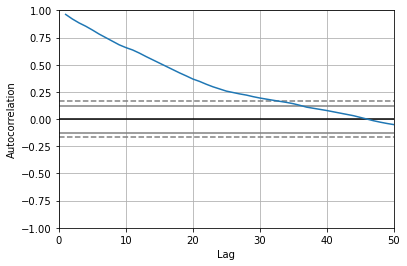

In [43]:
ax = autocorrelation_plot(idx['Idx_Price'])
ax.set_xlim([0, 50])
# 15 days lag has significant correlation.

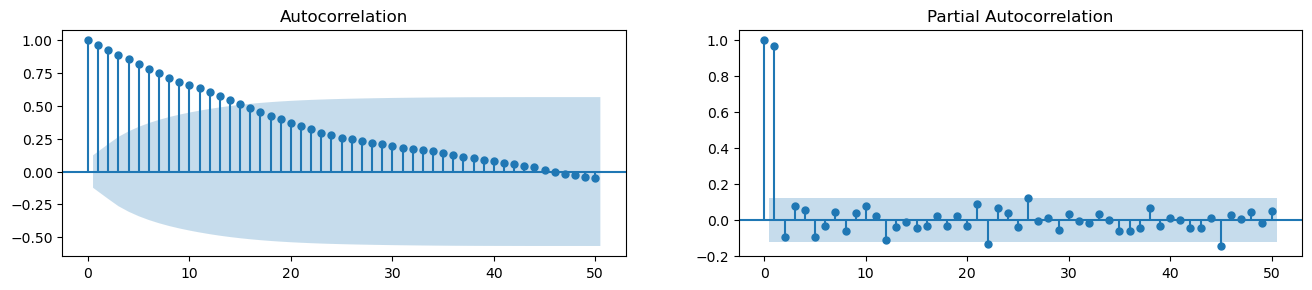

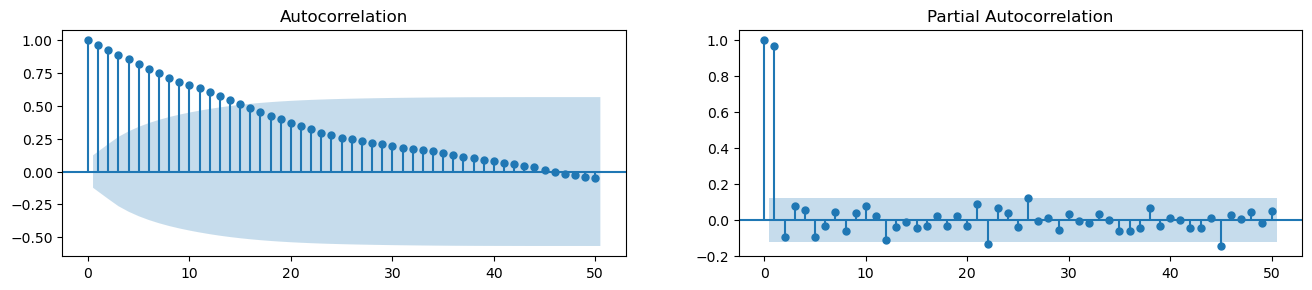

In [121]:
# partial autocorrelation
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(idx['Idx_Price'].tolist(), lags=50, ax=axes[0])
plot_pacf(idx['Idx_Price'].tolist(), lags=50, ax=axes[1])

### cointegration test

## Detrend a timeseries

1. Subtract the line of best fit from the time series.
2. Subtract the trend component obtained from time series decomposition we saw earlier.

In [5]:
# Using scipy: Subtract the line of best fit
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

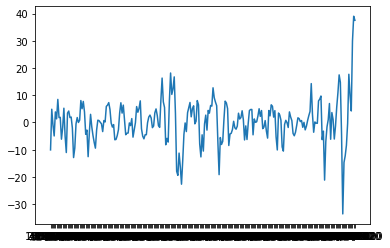

In [109]:
result_mul = seasonal_decompose(idx['Idx_Price'], model='multiplicative', extrapolate_trend='freq', period=12)
detrended = idx['Idx_Price'].values - result_mul.trend
plt.plot(detrended)
# plt.title('Index detrended by subtracting the trend component', fontsize=16)

## test seasonality - ACF plot

When there is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

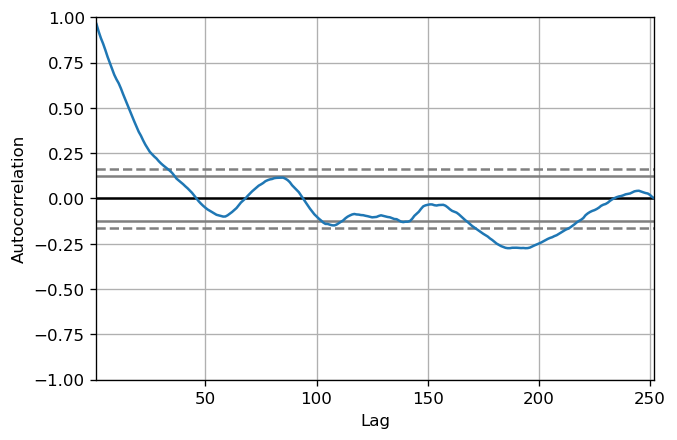

In [118]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
autocorrelation_plot(idx['Idx_Price'].tolist())
# no recognized spike, no seasonality!

## lag plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

In [6]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

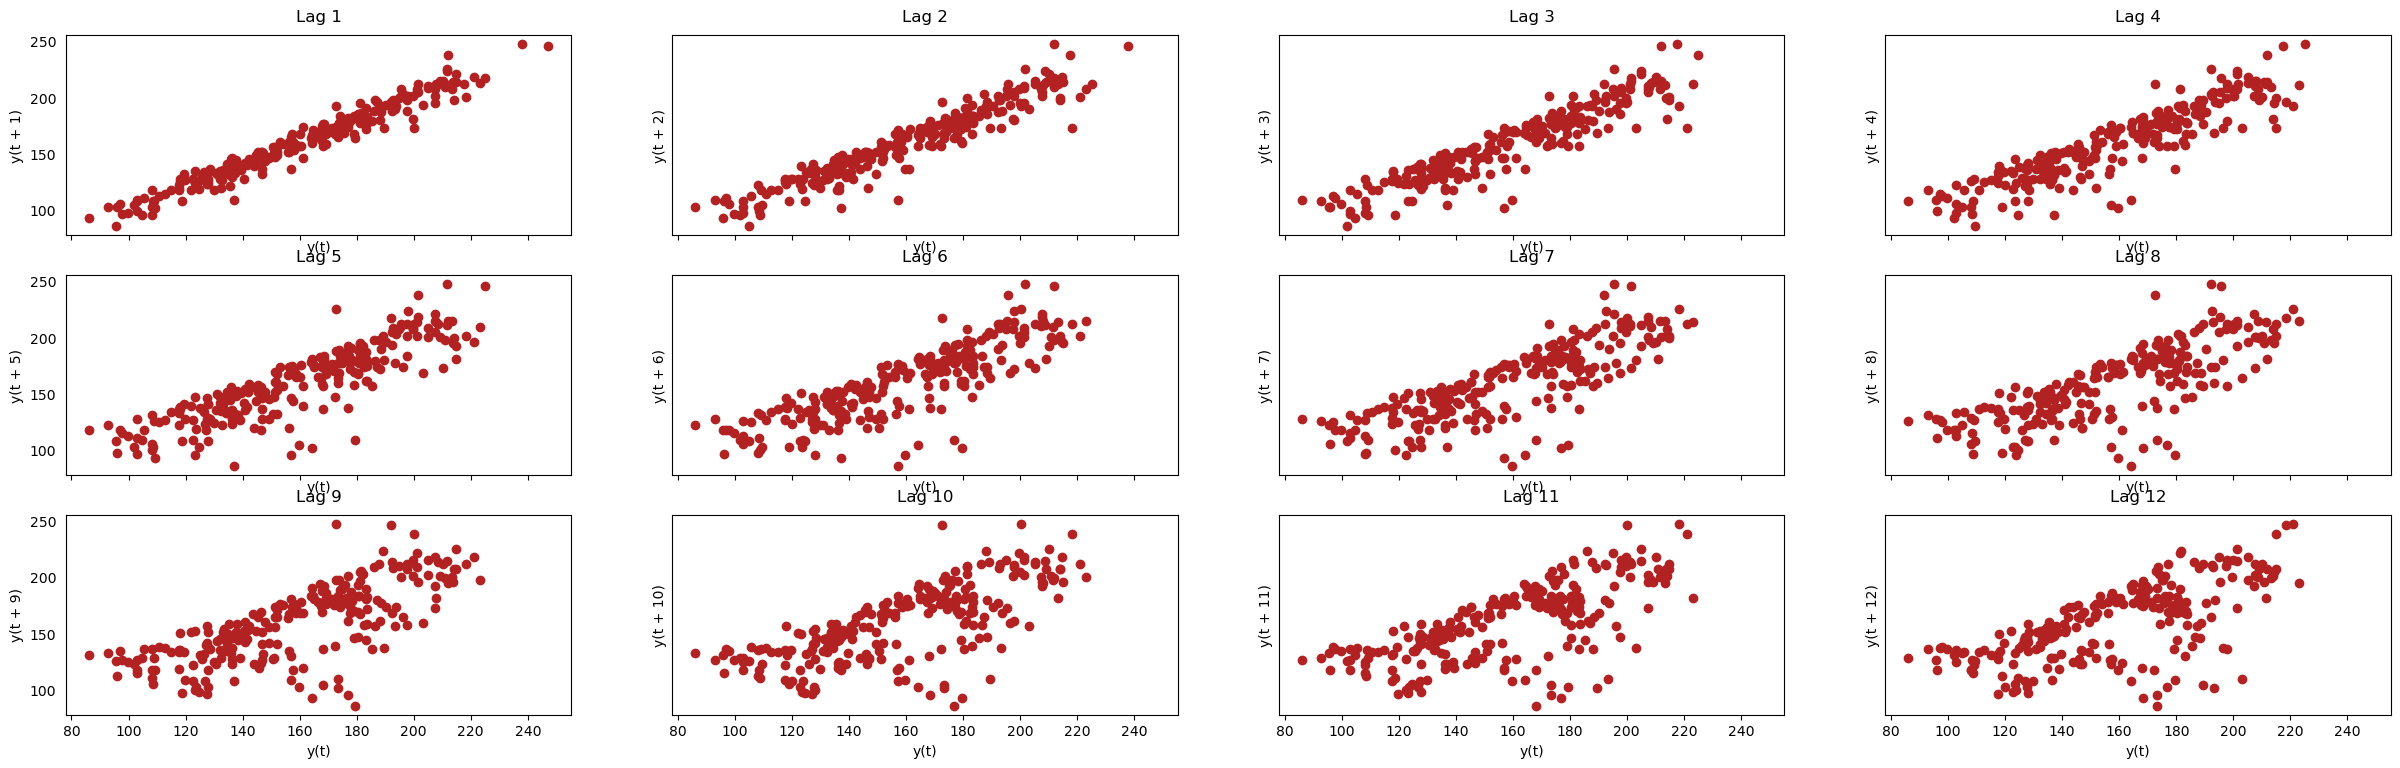

In [7]:
# Plot
fig, axes = plt.subplots(3, 4, figsize=(30,9), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:12]):
    lag_plot(idx['Idx_Price'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

plt.show()

# Benchmark model - ARIMA

## 1. make the time series stationary

Term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors.
- p is the order of the AR term, it refers to the number of lags of Y to be used as predictors.
- q is the order of the MA term, it refers to the number of lagged forecast errors that should do into the ARIMA model.
- d is the number of differencing required to make the time series stationary.

Determine the right order of differencing : 
Get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.

In the event, you can’t really decide between two orders of differencing, then go with the order that gives the least standard deviation in the differenced series.

Firstly, test series stationary: Augmented Dickey Fuller test.
You need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

In [15]:
# ADF Test
# the null hypothesis is the time series possesses a unit root and is non-stationary.
result = adfuller(idx['Idx_Price'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.106713380531536
p-value: 0.7123872744085853
Critial Values:
   1%, -3.456780859712
Critial Values:
   5%, -2.8731715065600003
Critial Values:
   10%, -2.572968544


In [16]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

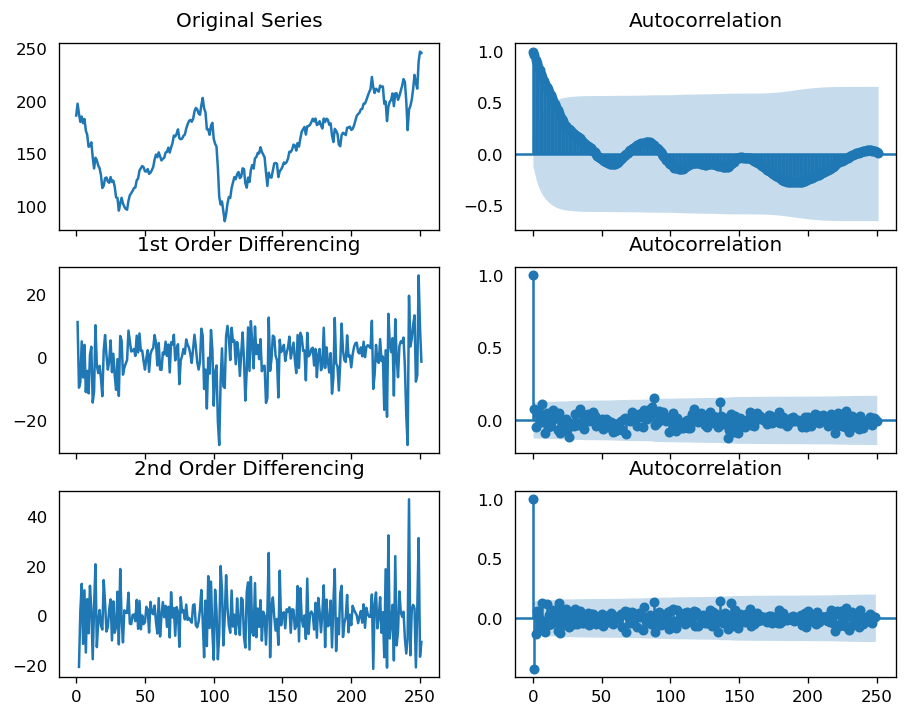

In [155]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)

axes[0, 0].plot(idx['Idx_Price']); axes[0, 0].set_title('Original Series')
plot_acf(idx['Idx_Price'], ax=axes[0, 1], lags=251)

# 1st Differencing
axes[1, 0].plot(idx['Idx_Price'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(idx['Idx_Price'].diff().dropna(), ax=axes[1, 1], lags=250)

# 2nd Differencing
axes[2, 0].plot(idx['Idx_Price'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(idx['Idx_Price'].diff().diff().dropna(), ax=axes[2, 1], lags=249)

plt.show()

### order of differenceing: d = 1 !!!

## 2. find AR term - p

You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot. Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags.

Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

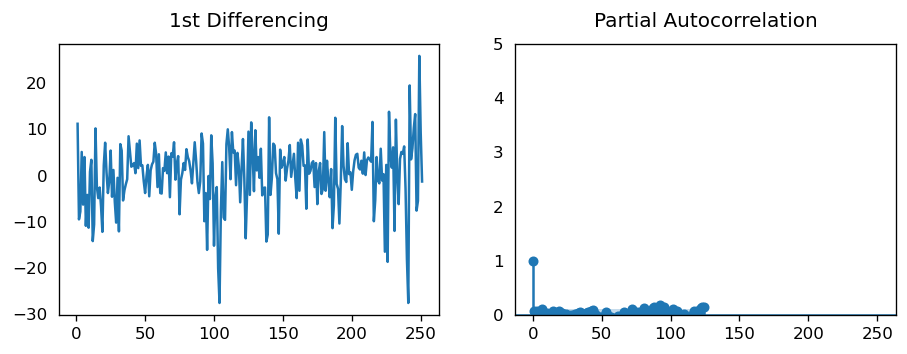

In [165]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)

axes[0].plot(idx['Idx_Price'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))

plot_pacf(idx['Idx_Price'].diff().dropna(), ax=axes[1], lags=124)

plt.show()

### P = 1!!! 

## 3. find MA term - q

An MA term is technically, the error of the lagged forecast. The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

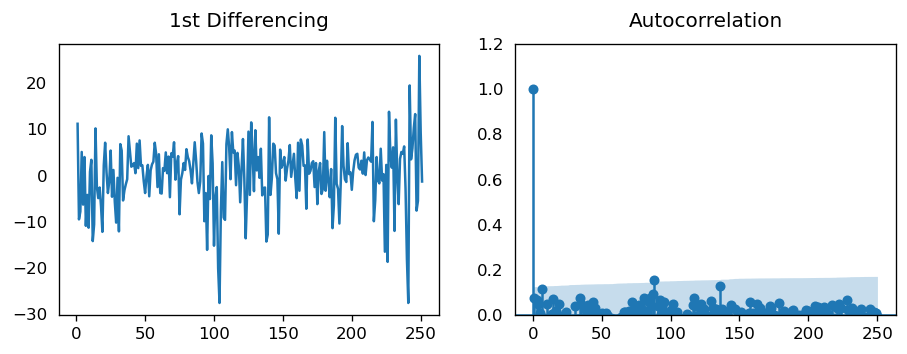

In [166]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(idx['Idx_Price'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(idx['Idx_Price'].diff().dropna(), ax=axes[1], lags=250)

plt.show()

### q = 1!!! 

## 4. Build ARIMA model

In [32]:
from statsmodels.tsa.arima_model import ARIMA
# 1,1,2 ARIMA Model
model = ARIMA(idx['Idx_Price'], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Idx_Price   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -845.643
Method:                       css-mle   S.D. of innovations              7.030
Date:                Wed, 25 Aug 2021   AIC                           1699.287
Time:                        19:36:13   BIC                           1713.388
Sample:                             1   HQIC                          1704.961
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2393      0.469      0.511      0.610      -0.679       1.158
ar.L1.D.Idx_Price    -0.5784      0.311     -1.860      0.063      -1.188       0.031
ma.L1.D.Idx_Price     0.

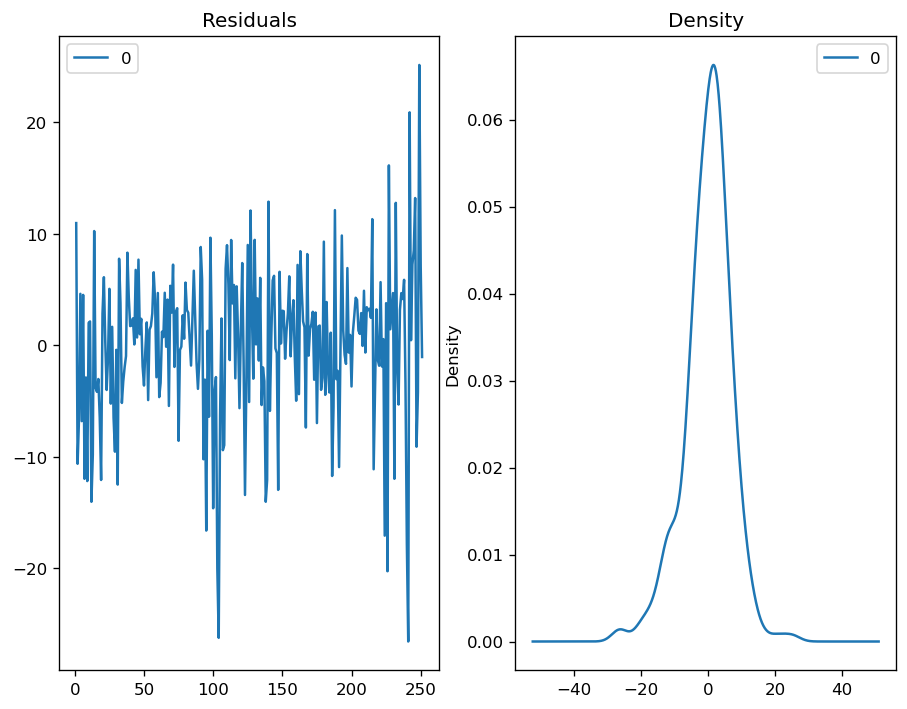

In [33]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)

fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

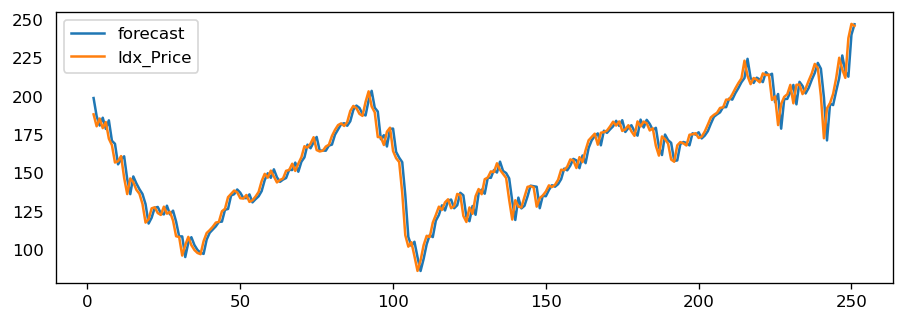

In [173]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)  # When you set dynamic=False the in-sample lagged values are used for prediction.
plt.show()

## 5. Out-of-Time Cross validation to find the optimal ARIMA model

In [34]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = idx['Idx_Price'][:202]  # 80% train, 10% test
test = idx['Idx_Price'][202:]
train.shape, test.shape

((202,), (50,))

In [285]:
np.mean(test)

205.41600000000003

                             ARIMA Model Results                              
Dep. Variable:           D2.Idx_Price   No. Observations:                  200
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -652.611
Method:                       css-mle   S.D. of innovations              6.246
Date:                Wed, 25 Aug 2021   AIC                           1317.222
Time:                        19:39:03   BIC                           1337.012
Sample:                             2   HQIC                          1325.231
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0089      0.010      0.920      0.357      -0.010       0.028
ar.L1.D2.Idx_Price     0.1420      0.071      2.003      0.045       0.003       0.281
ar.L2.D2.Idx_Price  

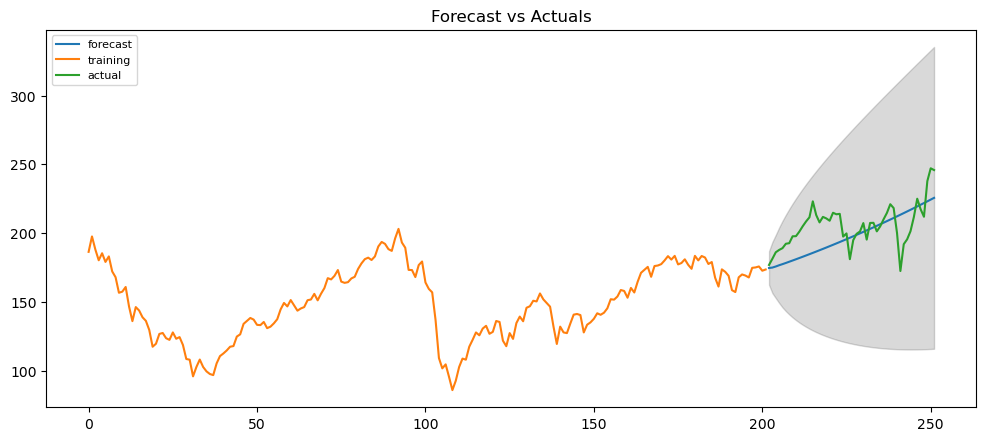

In [39]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc,se,conf = fitted.forecast(len(test), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(fc_series, label='forecast')
plt.plot(train, label='training')
plt.plot(test, label='actual')

plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [38]:
fc_series

NameError: name 'fc_series' is not defined

In [283]:
fc

array([174.78455512, 175.10419387, 175.8733034 , 176.78944455,
       177.59613534, 178.44784709, 179.3407848 , 180.22813702,
       181.12525873, 182.03687307, 182.9560493 , 183.88365507,
       184.82093428, 185.76703054, 186.72186265, 187.68565055,
       188.65831021, 189.63980381, 190.63016246, 191.62938123,
       192.63745207, 193.65437852, 194.68016094, 195.71479799,
       196.75828997, 197.81063706, 198.87183907, 199.94189602,
       201.02080792, 202.10857478, 203.20519657, 204.31067332,
       205.42500501, 206.54819164, 207.68023322, 208.82112974,
       209.9708812 , 211.12948762, 212.29694897, 213.47326527,
       214.65843652, 215.85246271, 217.05534385, 218.26707993,
       219.48767095, 220.71711692, 221.95541783, 223.20257369,
       224.4585845 , 225.72345024, 226.99717094, 228.27974657])

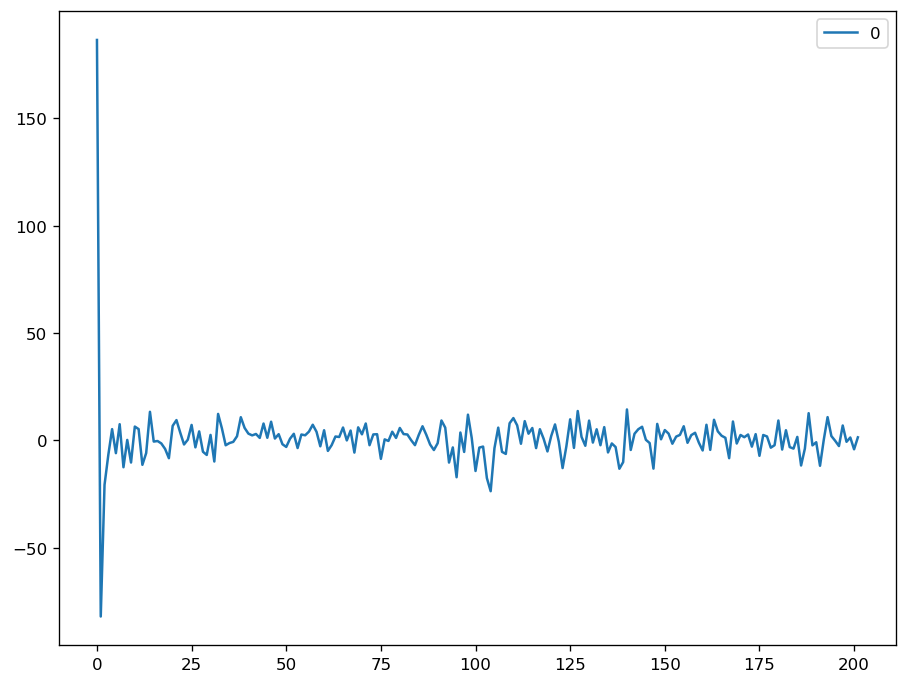

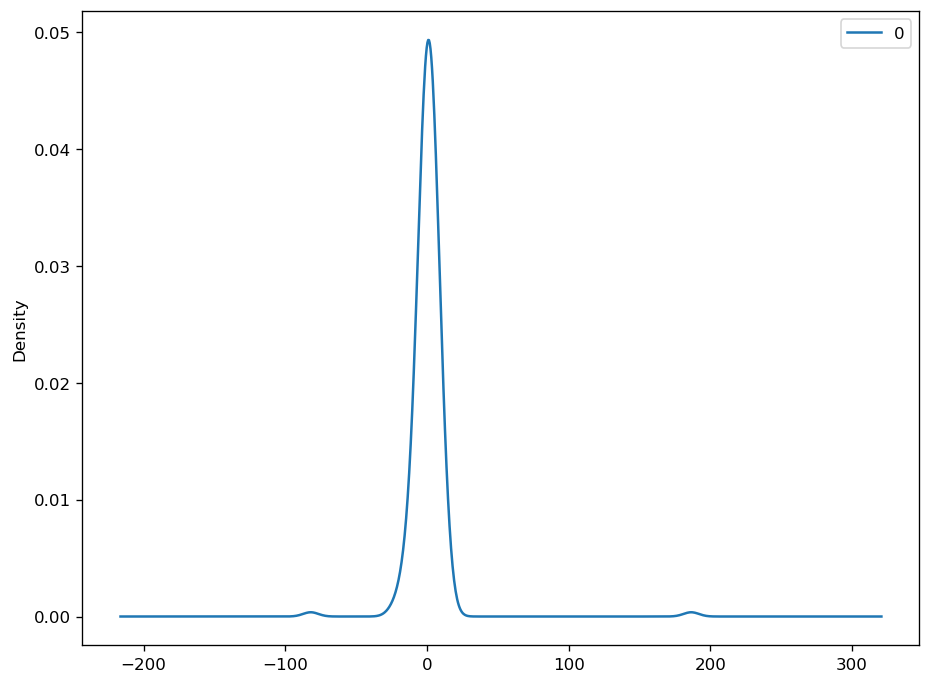

                0
count  202.000000
mean     0.916150
std     15.700688
min    -82.050601
25%     -3.135560
50%      1.137858
75%      4.708624
max    186.500000


In [24]:
# plot residual erros
residuals = pd.DataFrame(fitted.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

### time-series cross validataion

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
# import statsmodels.api as sm

In [27]:
# Accuracy metrics
def forecast_accuracy(actual, forecast):
    
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mae = mean_absolute_error(actual, forecast)
   #  corr = np.corrcoef(forecast, actual)[0,1]   # corr
   #  mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
   # maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
   #  minmax = 1 - np.mean(mins/maxs)    # Min-Max
    return({'MSE':mse, 'RMSE':rmse, 'MAE':mae})

In [28]:
tscv = TimeSeriesSplit(n_splits = 10)
rmse = []
mae = []
for train_index, test_index in tscv.split(idx['Idx_Price']):
    cv_train, cv_test = idx['Idx_Price'].iloc[train_index], idx['Idx_Price'].iloc[test_index]
    model = ARIMA(train, order=(3, 2, 1))  
    fitted = model.fit(disp=-1)  
    
    # Forecast
    fc, se, conf = fitted.forecast(len(cv_test), alpha=0.05)  # 95% conf
    
    true_values = cv_test.values
    rmse.append(np.sqrt(mean_squared_error(true_values, fc)))
    mae.append(mean_absolute_error(true_values, fc))
    print(forecast_accuracy(true_values, fc))
    
print("RMSE: {}".format(np.mean(rmse)))
print("MAE: {}".format(np.mean(mae)))

TypeError: fit() got an unexpected keyword argument 'disp'

Around 2.2% MAPE implies the model is about 97.8% accurate in predicting the next 15 observations.